## Matplotlib & Seaborn

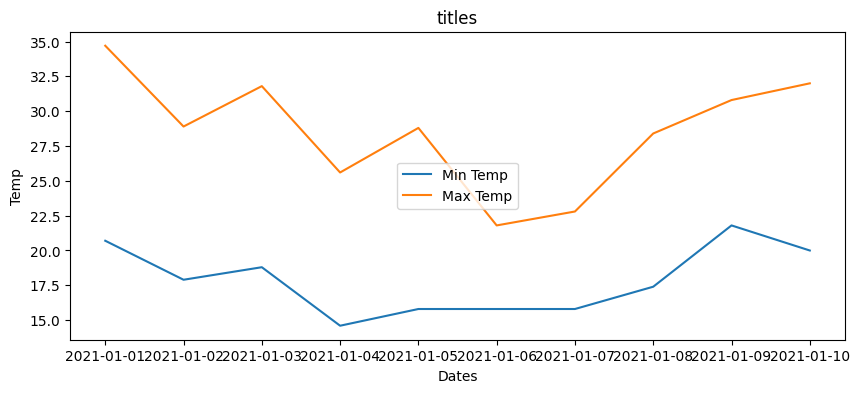

In [8]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

# 객체지향 형태로 문법을 시작하세요!!
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dates, min_temperature, label = 'Min Temp')
ax.plot(dates, max_temperature, label = 'Max Temp')
ax.legend(loc=10)
ax.set_xlabel("Dates")
ax.set_ylabel("Temp")
ax.set_title("titles")

plt.show()

In [9]:
!pip install yfinance --upgrade --no-cache-dir

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.3/3.0 MB 9.9 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 8.9 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/3.0 MB 8.3 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/3.0 MB 8.3 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/3.0 MB 8.3 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 5.0 MB/s eta 0:00:01
     --------------------- ------------------ 1.6/3.0 MB 5.4 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 7.7 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 7.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import yfinance as yf
TSLA = yf.download("TSLA", start="2020-01-01", end="2024-07-02")
TSLA.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


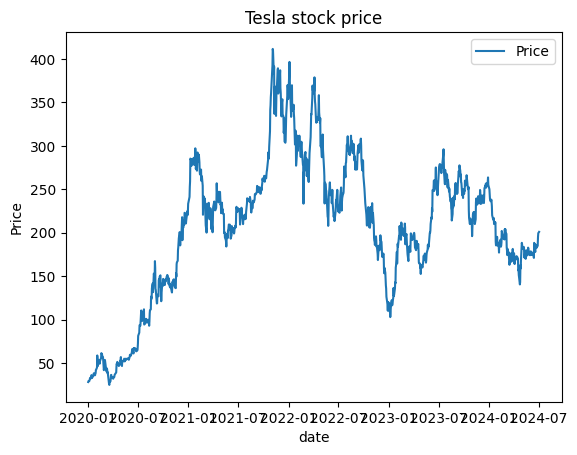

In [20]:
fig, ax = plt.subplots()
ax.plot(TSLA['Open'])
ax.set_title("Tesla stock price")
ax.set_xlabel("date")
ax.set_ylabel("Price")
ax.legend(labels = ['Price'], loc = 'best')
plt.show()

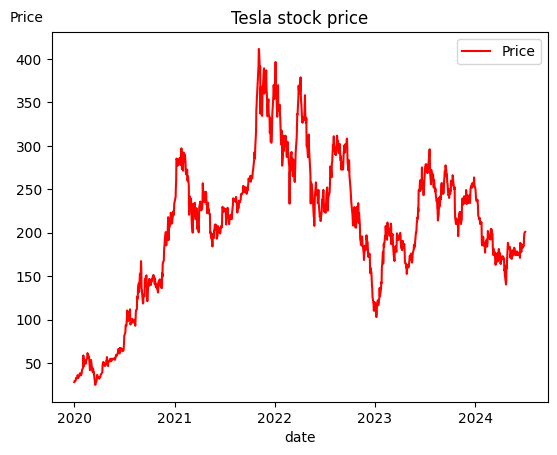

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# fig와 ax 생성
fig, ax = plt.subplots()

# 그래프를 빨간색으로 그리기 위해 color 인수 추가
ax.plot(TSLA['Open'], color='red')

# 제목, 레이블 및 범례 설정
ax.set_title("Tesla stock price")
ax.set_xlabel("date")
ax.set_ylabel("Price", rotation=0)  # 세로축 레이블을 가로로 회전

# 세로축 레이블의 위치 조정 (선택 사항)
ax.yaxis.set_label_coords(-0.05, 1.02)

# 가로축 포맷 설정 (년도만 표시)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 가로축 눈금 설정 (년도 단위)
ax.xaxis.set_major_locator(mdates.YearLocator())

ax.legend(labels=['Price'], loc='best')

# 그래프 표시
plt.show()


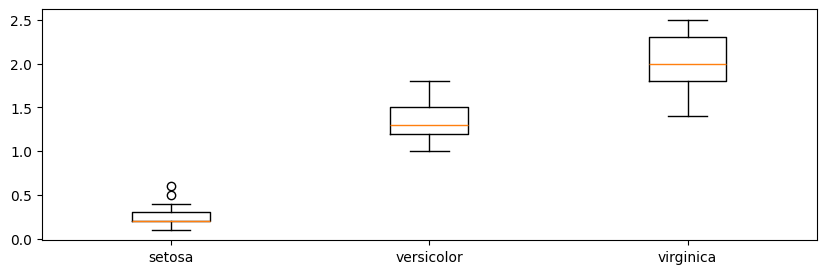

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

fig, ax = plt.subplots(figsize=(10, 3))
ax.boxplot(data, tick_labels=['setosa', 'versicolor', 'virginica'])

plt.show()

<class 'matplotlib.axes._axes.Axes'>


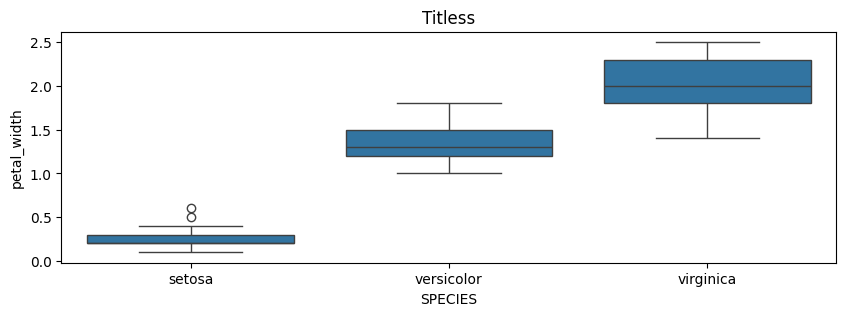

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(data = iris, x= 'species', y= 'petal_width', ax = ax)
ax.set_title("Titless")
ax.set_xlabel("SPECIES")
print(type(ax))
plt.show()
#세부수정은 matplotlib 간단한 통계 시각화는 seaborn

# 막대 그래프 그려보기

## 라이브러리 불러오기

In [42]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

## 데이터 불러오기

In [43]:
tips = sns.load_dataset("tips")
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


## 시각화 객체지향선언

## 기초 데이터

In [60]:
group_mean = tips.groupby(['day'], observed=False)['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
# h_day = group_mean.idxmax()
h_mean = float(np.round(group_mean.sort_values(ascending=False).values[0], 2))
h_day, h_mean

('Sun', 21.41)

축 옵션 UDF 함수

In [79]:
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

Rectangle(xy=(-0.4, 0), width=0.8, height=17.6827, angle=0) <class 'matplotlib.patches.Rectangle'>
Rectangle(xy=(0.6, 0), width=0.8, height=17.1516, angle=0) <class 'matplotlib.patches.Rectangle'>
Rectangle(xy=(1.6, 0), width=0.8, height=20.4414, angle=0) <class 'matplotlib.patches.Rectangle'>
Rectangle(xy=(2.6, 0), width=0.8, height=21.41, angle=0) <class 'matplotlib.patches.Rectangle'>
Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


C:\Users\user\AppData\Local\Temp\ipykernel_924\845817991.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)


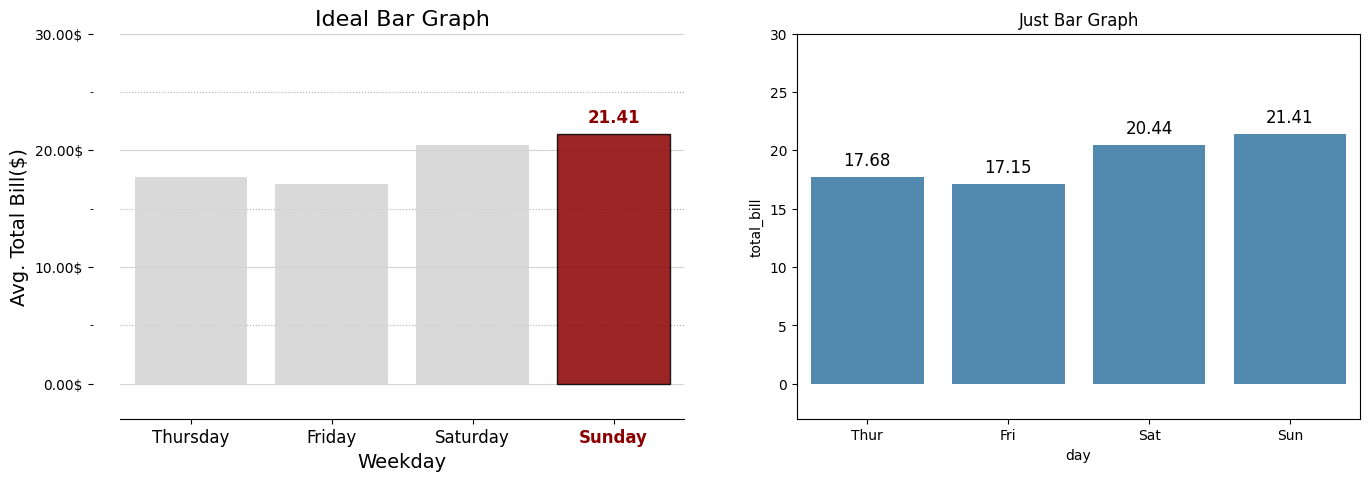

In [82]:
fig, ax = plt.subplots(nrows  = 1, ncols = 2, figsize=(16, 5))
ax0 = sns.barplot(x = 'day', y = 'total_bill', data = tips, 
                  errorbar=None, color = 'lightgray',  alpha = 0.85, zorder = 2, 
                  ax = ax[0])

for p in ax0.patches:
    print(p, type(p))
    fontweight = 'nomal'
    color = 'black'
    height = np.round(p.get_height(), 2)
    if h_mean == height:
        #sun이면 색상을 다르게 주겠다
        fontweight = 'bold'
        color = 'darkred'
        p.set_facecolor(color)
        p.set_edgecolor('black')
    #else
        #p.set_facecolor(color)
        #p.set_edgecolor('black')
ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)


ax1 = sns.barplot(x = 'day', y = 'total_bill', data = tips, 
                  errorbar=None, alpha = 0.85, ax = ax[1])

for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

plt.show()